In [1]:
from csv_diff import load_csv, compare
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
PA = pd.read_csv('PA.csv', header = 1)
PA.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,start,end,start.1,end.1,start.2,used others values?,use my terms,refer back to tutorial,end.2,Unnamed: 14,Unnamed: 15,zip,"(small, major)",Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,down to seconds,NaN,NaN,NaN,NaN,(# of times),(# of times),(# of times),NaN,NaN,NaN,NaN,NaN,NaN
1,m01,NaN,NaN,NaN,yes,15:36:03,15:50:03,15:27:38,15:32:40,15:50:27,NaN,NaN,NaN,16:02:46,Yes,NaN,Yes,NaN,NaN
2,m02,NaN,NaN,NaN,yes,15:13:11,15:24:47,15:06:33,15:11:36,15:25:09,NaN,NaN,NaN,15:42:14,Yes,NaN,Yes,NaN,NaN
3,p01,NaN,NaN,123456,yes,15:47:30,15:57:37,15:41:21,15:46:25,16:00:00,NaN,NaN,NaN,16:14:10,Yes,NaN,Yes,NaN,NaN
4,p03,NaN,NaN,123456,yes,16:15:42,16:36:10,16:05:45,16:10:37,16:38:51,NaN,NaN,NaN,16:51:00,Yes,NaN,NaN,small delays,NaN


**Q1** Will the time taken for the users to enter a set of characters using Character Recorder be roughly the same as the time taken using Excel?

In [3]:
EX = pd.to_datetime(PA["end.1"][1:]) - pd.to_datetime(PA["start.1"][1:])
CR = pd.to_datetime(PA["end.2"][1:]) - pd.to_datetime(PA["start.2"][1:])

In [4]:
EX.mean()

Timedelta('0 days 00:07:09.181818181')

<AxesSubplot:ylabel='Frequency'>

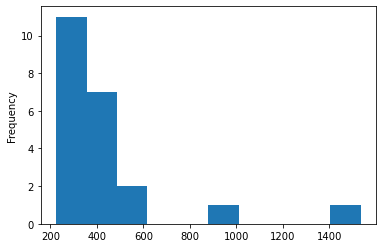

In [5]:
EX.astype('timedelta64[s]').plot.hist()

In [6]:
CR.mean()

Timedelta('0 days 00:12:50.181818181')

<AxesSubplot:ylabel='Frequency'>

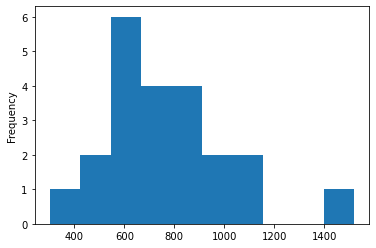

In [7]:
CR.astype('timedelta64[s]').plot.hist()

**Q2** Will the data entered using Character Recorder be more consistent than the data entered using Excel? 

**Q3** Will the user add new terms to the ontology while using Character Recorder? If so, how often?

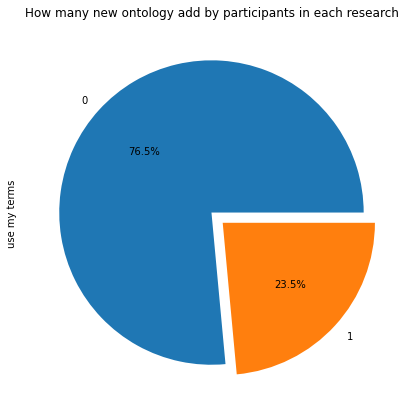

In [8]:
plt.figure(figsize=[9,7])
PA["use my terms"][1:].dropna().value_counts().plot.pie(explode = (0, 0.1), autopct='%1.1f%%')
plt.title("How many new ontology add by participants in each research")
plt.show()

**Q4** Will the terms added by different users to the ontology create conflicts in the ontology? If so, what kinds of conflict? and what are their relative frequency? 

**Q5** Will the user find the software intuitive to use and instructions clear and easy to follow?